# Matin Ghorbani 6.2.Assignment
---

## Import Dependencies

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from knn_finding_nemo_dory import KNN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Load the dataset with scikit-learn.

In [24]:
iris = load_iris()
x = iris.data
y = iris.target

## Split dataset to train and test datasets (%80 for train and %20 for test).

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

## Implement and fit our object oriented KNN algorithm on the train dataset.

In [26]:
knn = KNN(7)
knn.fit(x_train, y_train)

## Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ...

In [27]:
df = pd.DataFrame()
n_neighbors, scores = [], []

for k in range(1, 22, 2):
    knn = KNN(k)
    knn.fit(x_train, y_train)
    score = knn.evaluate(x_test, y_test)

    n_neighbors.append(k)
    scores.append(score)

df['n_neighbors'] = n_neighbors
df['scores'] = scores

df

,n_neighbors,scores
0,1,0.966667
1,3,0.966667
2,5,1.000000
3,7,1.000000
4,9,0.966667
5,11,0.966667
6,13,0.966667
7,15,0.966667
8,17,1.000000
9,19,0.966667


## Calculate confusion matrix for test dataset (3x3).

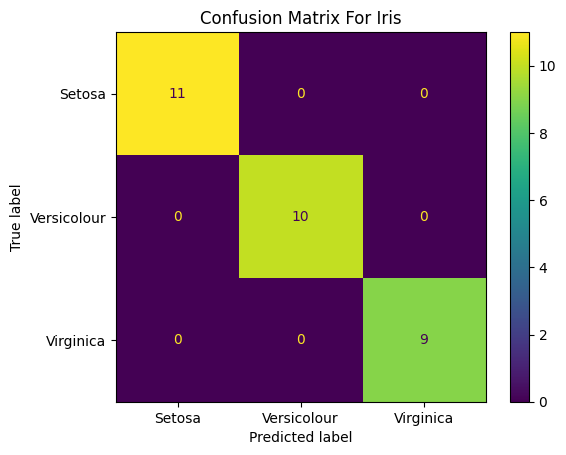

In [29]:
y_pred = knn.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion, display_labels=['Setosa', 'Versicolour', 'Virginica'])
cm_display.plot()
plt.title('Confusion Matrix For Iris')
plt.show()